In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, Video

# 注意: 有问题请到trello答疑板块提问, 谢谢.



# 介绍

`Numpy` 提供多维数组对象以及一系列操作数组的函数, 可以说其几乎是每一个`Python`科学计算软件的基础库.

In [2]:
import numpy as np

`Numpy`的核心数据结构是`ndarray`, 它用来存储具有相同数据类型的多维数组. 除了数据, `ndarry`也包含数组的`shape, size, ndim, nbytes, dtype`.

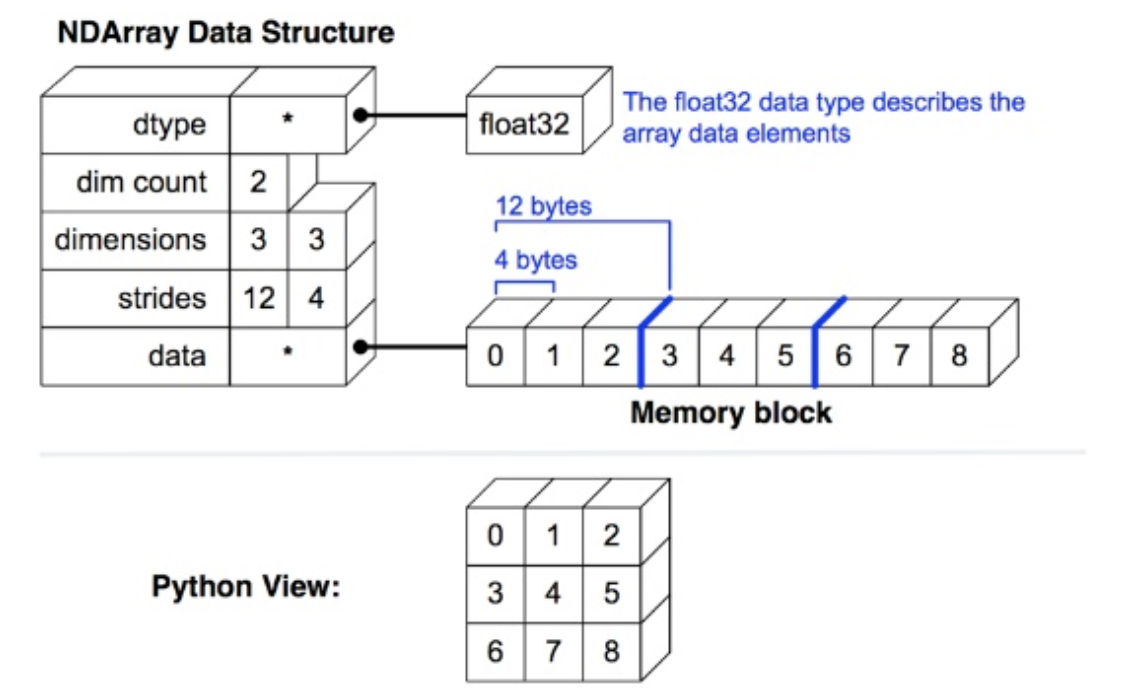

In [3]:
np.ndarray?

In [4]:
d0 = np.array([[1, 2], [3,4]])

In [5]:
type(d0), d0.shape, d0.size, d0.ndim, d0.dtype, d0.nbytes

(numpy.ndarray, (2, 2), 4, 2, dtype('int64'), 32)

为什么需要`numpy`? 速度! 简单! 粗略比较一下速度.

In [6]:
a0 = np.arange(10000)
t0 = %timeit -o [i**2 for i in a0]

1.8 ms ± 83.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
a1 = np.arange(10000)
t1 = %timeit -o a1**2

3.7 µs ± 89.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
t0.best/t1.best

478.0437326629636

In [9]:
a = np.random.randn(3,3)

In [10]:
a

array([[ 0.91472524,  1.56546911,  0.73686108],
       [-1.08447157, -0.50144169, -0.78842176],
       [-0.32972884, -1.66293665,  0.80975944]])

In [11]:
a@a

array([[-1.10394883, -0.57837066,  0.03645574],
       [-0.18822887, -0.13516754, -1.04218932],
       [ 1.23479519, -1.02889322,  1.72384145]])

## 数据类型

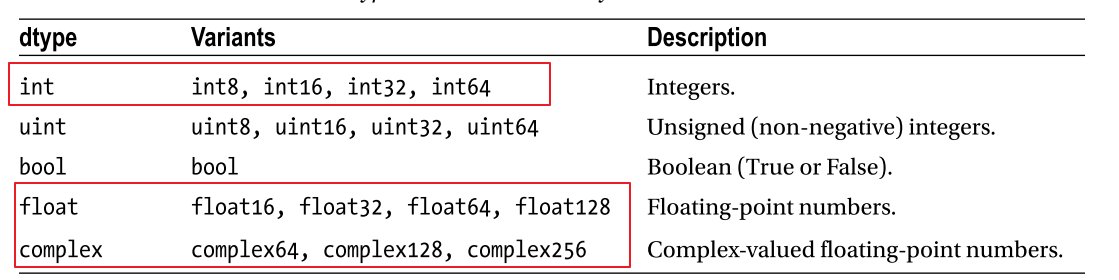

详细参考: [numpy datatypes](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

In [13]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


In [14]:
z.nbytes*8 # nbits

128

In [15]:
x1 = x + 0.3
print(x1, x1.dtype)

[1.3 2.3] float64


In [16]:
z[0] = 3.5
z

array([3, 2])

如何使用类型: 一般指定int, float, complex 即可, 不需要细分int16, int32等

In [17]:
np.sqrt([-1, 2, 3])

/Users/hlyang/Root/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 1.41421356, 1.73205081])

In [18]:
np.sqrt([-1, 2, 3], dtype=np.complex)

array([0.        +1.j, 1.41421356+0.j, 1.73205081+0.j])

## 存储顺序

多维数组在内存中是连续储存的, 本质上可以看成是一维, 如何将内存中数据映射到多维数组中取决于数组是按行存储的还是按列存储的. 例如有四个整数1,2,3,4, 那么:

* 按行存储就是: [[1, 2], [3, 4]]
* 按列存储就是: [[1, 3], [2, 4]]

Fotran是按列存储的, C是按行存储的.

In [19]:
a = np.arange(6, dtype=np.int8)

In [20]:
a1 = a.reshape(2,3, order="F")
a1

array([[0, 2, 4],
       [1, 3, 5]], dtype=int8)

In [21]:
a2 = a.reshape(2,3)
a2

array([[0, 1, 2],
       [3, 4, 5]], dtype=int8)

什么时候需要考虑存储顺序? 

跟其他语言交互的时候, 比如调用`Fortran`(`Numpy`, `Scipy`中很多数值
就是调用`Fortran`的, `Anconda`现在默认使用`intel mkl`也是`Fortran`的), 但是平常使用不需要关心顺序.

`Numpy`中使用`ndarray.strides`确定映射的顺序.

In [22]:
a1.strides

(1, 2)

In [23]:
a.dtype

dtype('int8')

In [24]:
a2.strides

(3, 1)

`strides`确定对应维度移动一个元素应内存中移动的字节数, 如对应a1, 有(1x1, 2x1), 对应a2, 有(3x1, 1x1).

某些操作, 如`transpose, reshape`, 只需要改变`strides`即可.

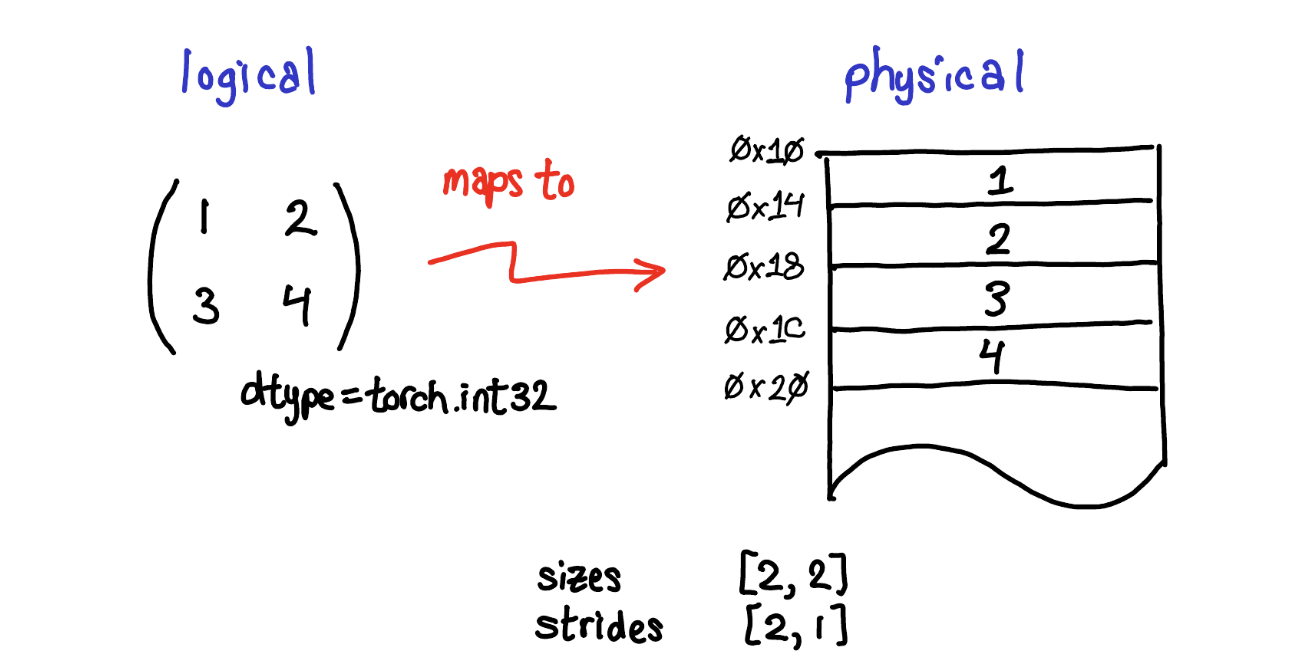

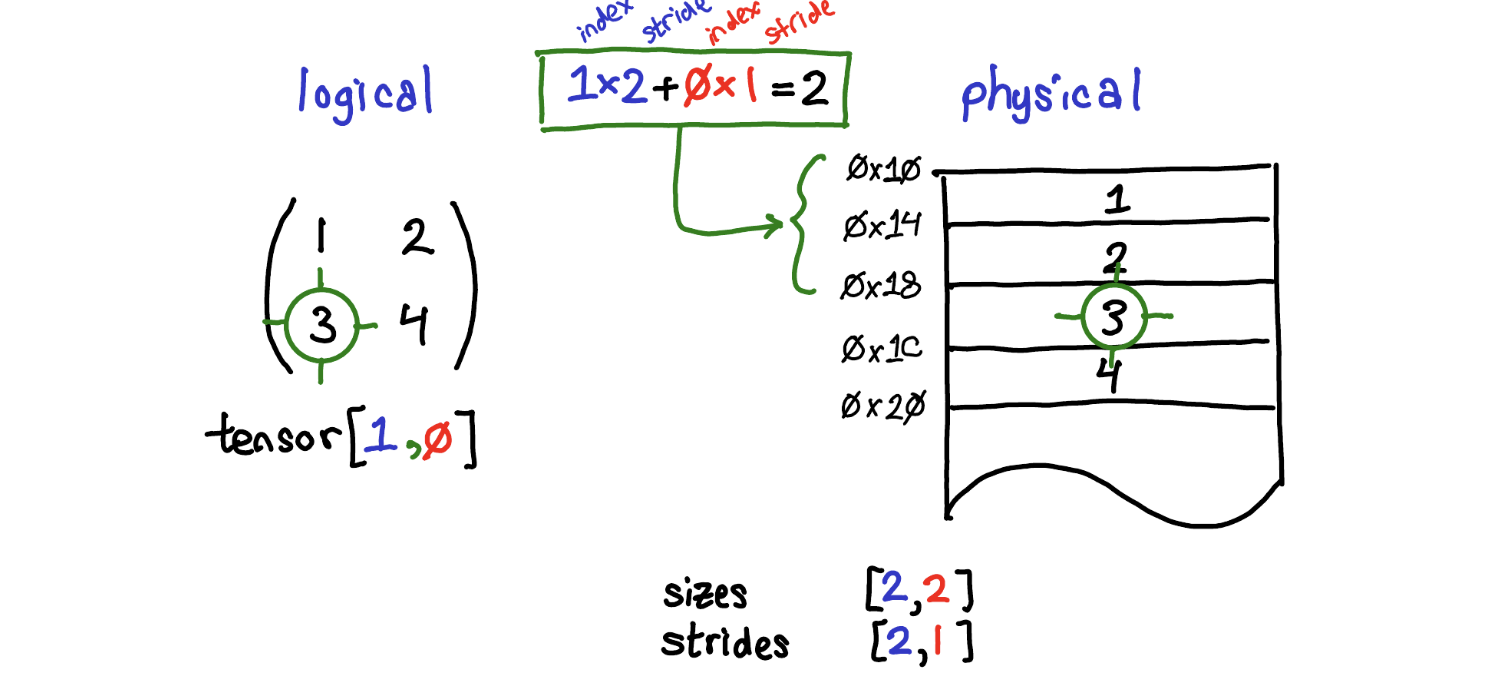

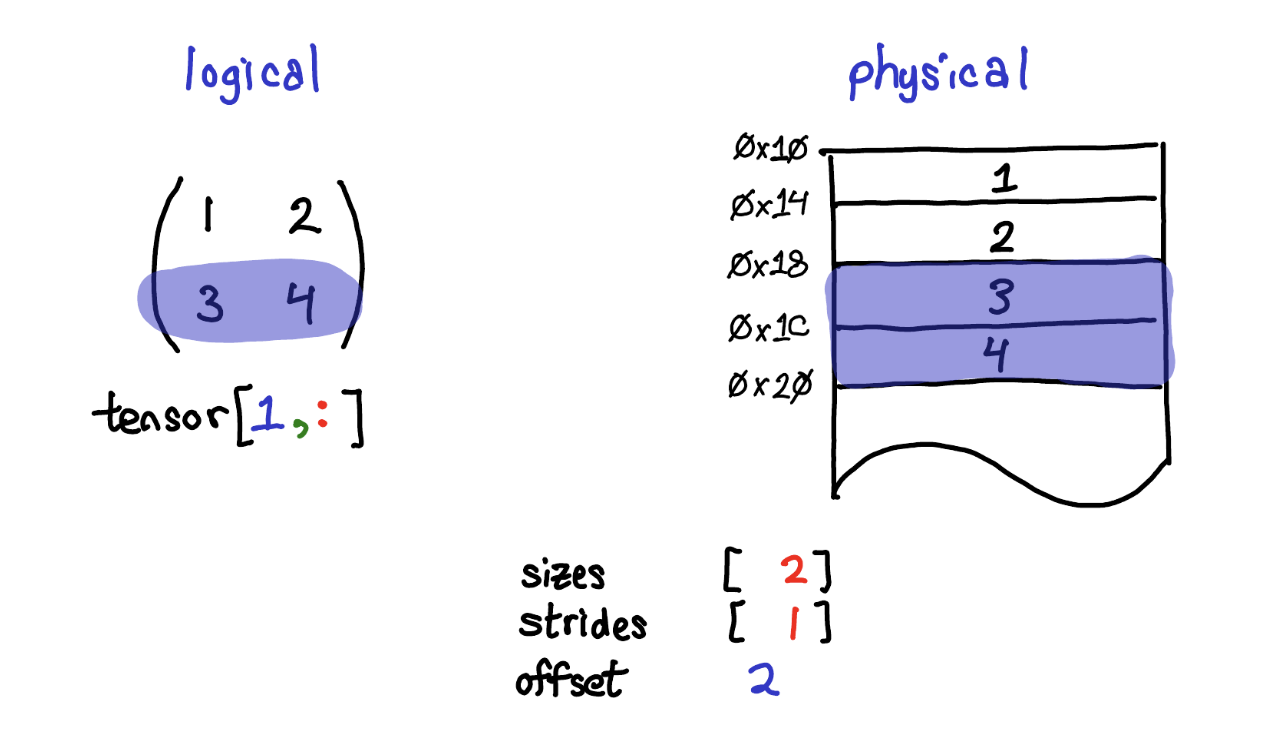

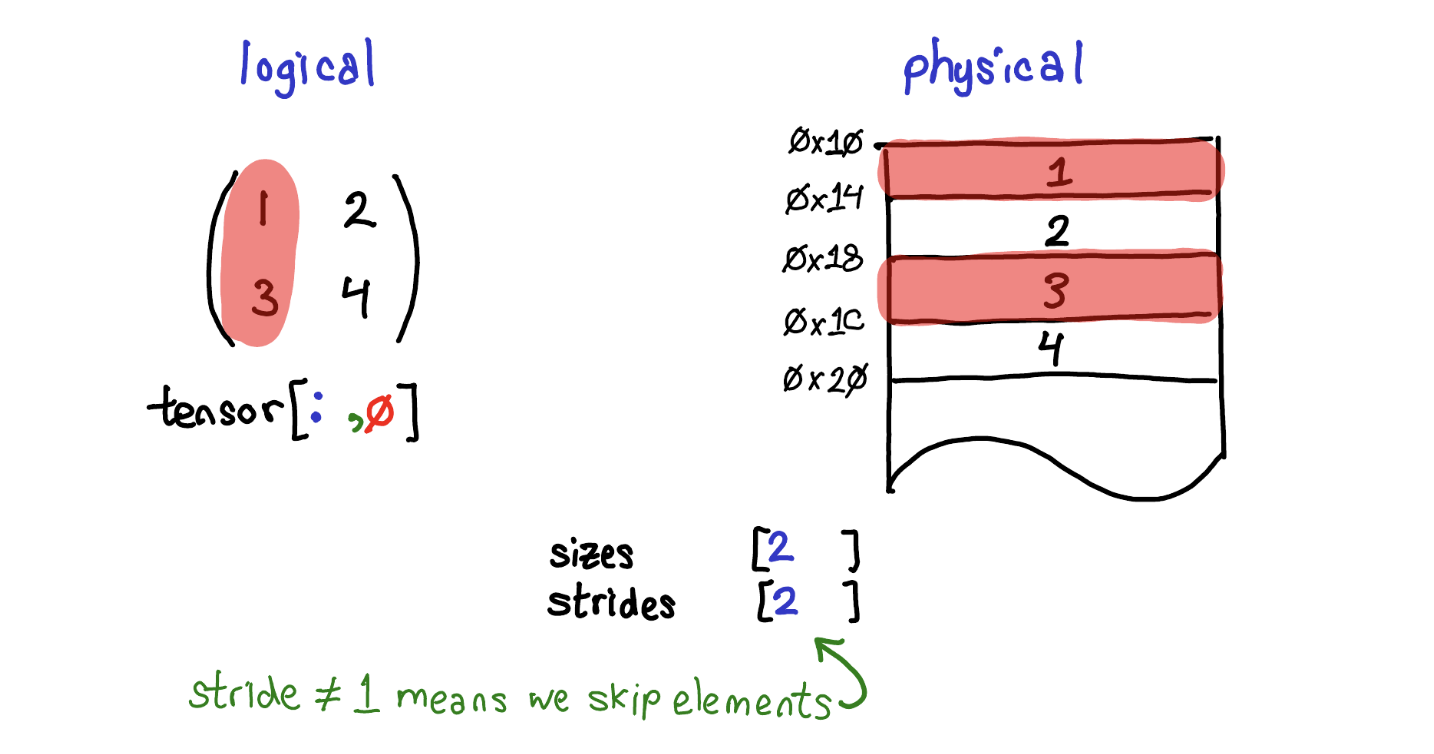

In [25]:
a = np.random.rand(10, 3)

In [26]:
a.dtype, 64/8

(dtype('float64'), 8.0)

In [27]:
a.strides

(24, 8)

In [28]:
a

array([[0.25234752, 0.97543318, 0.00128544],
       [0.20707686, 0.05219267, 0.40547696],
       [0.01092887, 0.22762848, 0.10869355],
       [0.60600365, 0.18106167, 0.58551654],
       [0.98761927, 0.18150943, 0.59413338],
       [0.90953679, 0.90001697, 0.41597811],
       [0.06700591, 0.5934618 , 0.93580157],
       [0.50948449, 0.73093127, 0.40416473],
       [0.39629128, 0.42477549, 0.24599073],
       [0.87722682, 0.47005369, 0.26867796]])

In [29]:
b = a.transpose()

In [30]:
b.strides

(8, 24)

In [31]:
np.shares_memory(a, b)

True

In [32]:
c = a.reshape(3, 10)

In [33]:
np.shares_memory(a, c)

True

In [34]:
b[0, :]

array([0.25234752, 0.20707686, 0.01092887, 0.60600365, 0.98761927,
       0.90953679, 0.06700591, 0.50948449, 0.39629128, 0.87722682])

In [35]:
a[0, 0] = 3.0

## 帮助

In [37]:
np.array?

In [38]:
np.con*?

In [39]:
>>> np.array([1, 2, 3])

array([1, 2, 3])

In [40]:
>>> np.array([1, 2, 3], dtype=complex)

array([1.+0.j, 2.+0.j, 3.+0.j])

google: numpy add a row

# 数组创建

## 从列表创建

In [41]:
a = np.array([[1,2,3], [4, 5, 6]])
b = np.array([1, 2, 3])

In [42]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [43]:
b

array([1, 2, 3])

In [44]:
print("a:", a.shape, a.size, type(a), np.ndim(a))
print("b:", b.shape, b.size, type(b), np.ndim(b))

a: (2, 3) 6 <class 'numpy.ndarray'> 2
b: (3,) 3 <class 'numpy.ndarray'> 1


In [45]:
len(a), len(b) # 返回第一个维度的长度

(2, 3)

In [46]:
for i in a:
    print(i)

[1 2 3]
[4 5 6]


In [47]:
a[1]

array([4, 5, 6])

In [48]:
np.array([i for i in range(10) if i % 2 ==0])

array([0, 2, 4, 6, 8])

## 使用`Numpy`函数创建

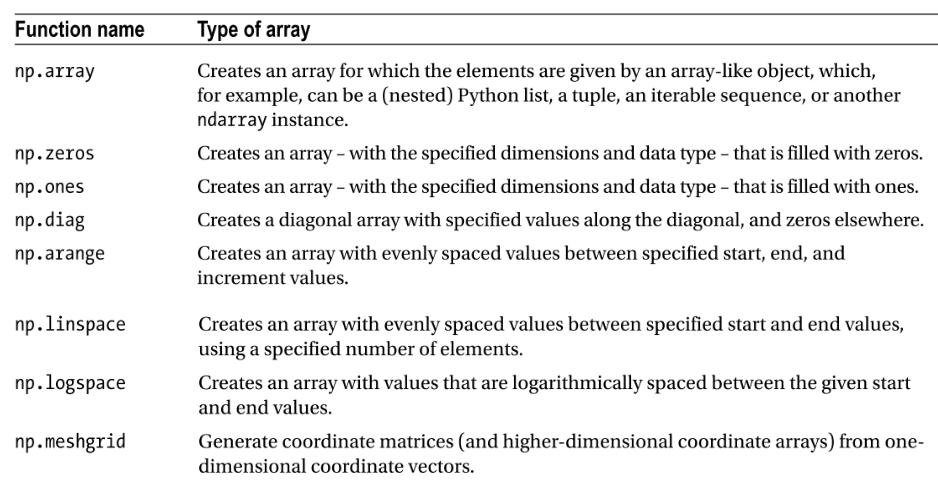

In [49]:
np.zeros?

In [50]:
np.zeros((2,3), dtype=np.int)  # Create an array of all zeros

array([[0, 0, 0],
       [0, 0, 0]])

In [51]:
np.diag([1,3,4])

array([[1, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

In [52]:
np.diagonal(np.random.randn(3,3))

array([-0.1392116 ,  0.69299858, -0.89727606])

In [53]:
np.ones((3,2))   # Create an array of all ones

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [54]:
np.full((2,2), 0.3) # Create a constant array

array([[0.3, 0.3],
       [0.3, 0.3]])

In [55]:
np.eye(4)       # Create a 2x2 identity matrix

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [56]:
np.random.random((2,2)) # Create an array filled with random values

array([[0.8067551 , 0.49253603],
       [0.76737404, 0.95167259]])

In [57]:
np.arange(9).reshape(3,-1)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [58]:
np.linspace(0, 1.0, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [59]:
np.tril(np.arange(9).reshape(3,-1)) # np.triu

array([[0, 0, 0],
       [3, 4, 0],
       [6, 7, 8]])

In [60]:
np.random.rand(3,3)

array([[0.37473783, 0.10159107, 0.50950357],
       [0.16185256, 0.89685457, 0.46065078],
       [0.96669255, 0.2392698 , 0.26761093]])

In [61]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

In [62]:
np.linspace(0, 1.0, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

## 从文件读取

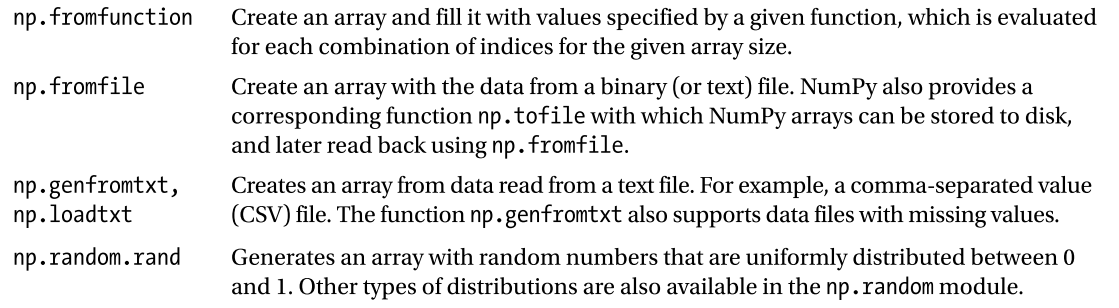

In [63]:
# !head test.dat
# !wc test.dat

In [71]:
# a = np.genfromtxt("test.dat", delimiter=",", comments="#")

In [72]:
# a[:10], a.shape

(array([[0.02505227, 0.69813311, 0.96017251, 0.0889025 , 0.49682652],
        [0.19058774, 0.90816399, 0.56805995, 0.86684287, 0.23252906],
        [0.38960964, 0.76966835, 0.70711317, 0.24245236, 0.39280797],
        [0.86803759, 0.25008565, 0.74289616, 0.2749561 , 0.66790504],
        [0.34078177, 0.90869074, 0.0474799 , 0.61847482, 0.78455257],
        [0.43342282, 0.6537826 , 0.31621284, 0.32782525, 0.86101467],
        [0.83225108, 0.35415887, 0.9292967 , 0.85215665, 0.64914206],
        [0.74429598, 0.64336778, 0.18626799, 0.43016612, 0.99699478],
        [0.78280802, 0.96783102, 0.54789044, 0.10016992, 0.60280171],
        [0.90584887, 0.78097013, 0.35285259, 0.15120871, 0.72350659]]),
 (100, 5))

In [64]:
# 保存数组到可读文件
np.savetxt("test.dat", np.random.random((100, 5)), delimiter=",", header="show how to save array dat.\n a simple example")

# 保存二进制文件
np.savetxt("test.npy", np.random.random((1000, 5)))

In [65]:
# 读取大文件
def generate_text_file(length=1e6, ncols=20):
    data = np.random.random((int(length), int(ncols)))
    np.savetxt('large_text_file.csv', data, delimiter=',')

def iter_loadtxt(filename, delimiter=',', skiprows=0, dtype=float):
    def iter_func():
        with open(filename, 'r') as infile:
            for _ in range(skiprows):
                next(infile)
            for line in infile:
                line = line.rstrip().split(delimiter)
                for item in line:
                    yield dtype(item)
        iter_loadtxt.rowlength = len(line)

    data = np.fromiter(iter_func(), dtype=dtype)
    data = data.reshape((-1, iter_loadtxt.rowlength))
    return data

In [66]:
# generate_text_file() # 477M

In [67]:
!ls -lh large_text_file.csv

ls: large_text_file.csv: No such file or directory


In [69]:
# %time data = np.genfromtxt('large_text_file.csv', delimiter=",")

In [119]:
# %time data = iter_loadtxt('large_text_file.csv')

In [70]:
# %time data = pd.read_csv('large_text_file.csv')

# 索引与切片

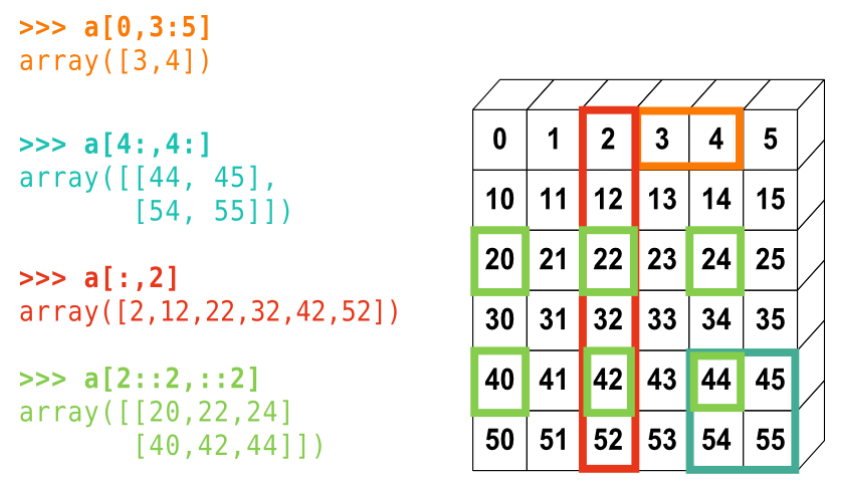

[Numpy index](https://docs.scipy.org/doc/numpy/user/basics.indexing.html)

In [71]:
a = np.array([[i+j for j in range(6)] for i in range(0, 60, 10)])
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [72]:
np.repeat(range(5), 5)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4])

In [73]:
np.arange(6) + np.arange(0, 60, 10).reshape(6, -1)

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

## 索引 (indexing)

In [74]:
print(a[0, 0], a[1, 2], a[2, 2])

0 12 22


In [75]:
a[0, 2] = 3

## 切片 (Slicing)

In [76]:
a[:, 0], a[1, :], a[[1], :]

(array([ 0, 10, 20, 30, 40, 50]),
 array([10, 11, 12, 13, 14, 15]),
 array([[10, 11, 12, 13, 14, 15]]))

In [77]:
a[0, 3:5]

array([3, 4])

In [78]:
a[4:, 4:]

array([[44, 45],
       [54, 55]])

In [79]:
a[:, 2]

array([ 3, 12, 22, 32, 42, 52])

In [80]:
a[2::2, ::2]

array([[20, 22, 24],
       [40, 42, 44]])

## 整数数组索引(fancing index)

In [81]:
a[[1, 3], :] 

array([[10, 11, 12, 13, 14, 15],
       [30, 31, 32, 33, 34, 35]])

In [82]:
a[[1, 3], 4] = 0

In [83]:
a

array([[ 0,  1,  3,  3,  4,  5],
       [10, 11, 12, 13,  0, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33,  0, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

## 条件索引

In [84]:
a = np.random.random(10)*2 + -1 # random with(-1, 1)
a

array([ 0.80251426,  0.59237763,  0.38413941, -0.7376264 ,  0.15295321,
        0.28623413, -0.88017444,  0.33801494, -0.286677  ,  0.22064476])

In [85]:
a[a>0.3]

array([0.80251426, 0.59237763, 0.38413941, 0.33801494])

In [86]:
a>0.3

array([ True,  True,  True, False, False, False, False,  True, False,
       False])

In [87]:
c1 = (a>0.3) & (a<0.9)

In [88]:
a[c1]

array([0.80251426, 0.59237763, 0.38413941, 0.33801494])

## copies and views

In [89]:
a = np.arange(10)
b = a[::2]
b1 = a[5:]
c = a.copy()


In [90]:
np.may_share_memory(a, b)

True

In [91]:
np.may_share_memory(a, c)

False

In [92]:
np.may_share_memory(b, b1)

True

In [93]:
a.base is c

False

In [94]:
b.base is a

True

In [95]:
print(c.base)

None


In [96]:
print(b.base), a

[0 1 2 3 4 5 6 7 8 9]


(None, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [97]:
a = np.random.rand(3,3)
f1 = a.flatten()
f2 = a.ravel()
f3 = a.reshape(-1)


In [98]:
np.shares_memory(a, f1)

False

In [99]:
np.shares_memory(a, f2)

True

In [100]:
np.shares_memory(a, f3)

True

In [101]:
a

array([[0.20884587, 0.24732597, 0.1199375 ],
       [0.30905122, 0.89232461, 0.08955398],
       [0.48598964, 0.20986499, 0.56515478]])

In [102]:
a[:, 0] = 0.0

In [103]:
a

array([[0.        , 0.24732597, 0.1199375 ],
       [0.        , 0.89232461, 0.08955398],
       [0.        , 0.20986499, 0.56515478]])

In [104]:
f1

array([0.20884587, 0.24732597, 0.1199375 , 0.30905122, 0.89232461,
       0.08955398, 0.48598964, 0.20986499, 0.56515478])

In [105]:
f2

array([0.        , 0.24732597, 0.1199375 , 0.        , 0.89232461,
       0.08955398, 0.        , 0.20986499, 0.56515478])

In [106]:
f3[-1] = -10

In [107]:
np.ravel?

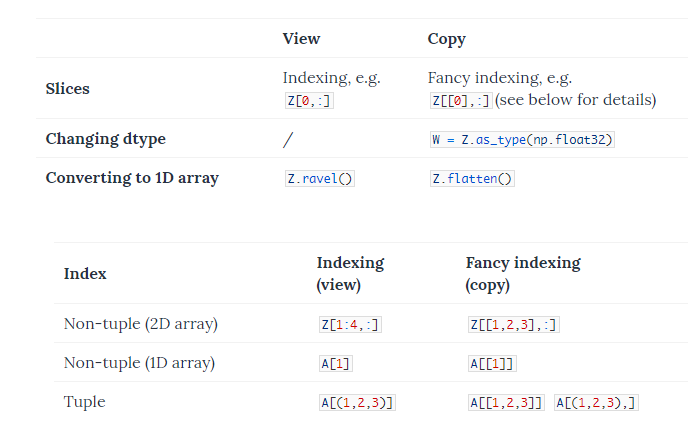

[Views versus copies in NumPy](https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html)

建议: 当你不想改变原数组的时候使用`np.copy`

# 数组操作

[Numpy functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)

## 数学操作

In [108]:
x = np.random.random((3,3))
y = np.random.random((3,3))

print(x,'\n\n', y)

[[0.67810139 0.0325038  0.16206038]
 [0.17622678 0.08654952 0.08292778]
 [0.87054583 0.95345    0.96152257]] 

 [[0.59342558 0.7922985  0.340406  ]
 [0.75864117 0.49290584 0.81328364]
 [0.82977836 0.67910687 0.32247757]]


In [109]:
x+y, x*y, x/y, x-y, x@y

(array([[1.27152697, 0.8248023 , 0.50246638],
        [0.93486796, 0.57945536, 0.89621143],
        [1.70032419, 1.63255687, 1.28400014]]),
 array([[0.40240271, 0.02575271, 0.05516633],
        [0.13369289, 0.04266076, 0.06744381],
        [0.72236009, 0.64749445, 0.31006946]]),
 array([[1.14268985, 0.04102469, 0.47607967],
        [0.23229267, 0.17559037, 0.10196662],
        [1.04913056, 1.40397636, 2.98167275]]),
 array([[ 0.08467581, -0.75979471, -0.17834563],
        [-0.58241439, -0.40635632, -0.73035586],
        [ 0.04076747,  0.27434312,  0.639045  ]]),
 array([[0.56153562, 0.66333634, 0.30952543],
        [0.23904919, 0.23860181, 0.15712031],
        [2.03778121, 1.81266982, 1.38183377]]))

In [110]:
np.sin(x), np.sqrt(y)

(array([[0.62731558, 0.03249807, 0.16135193],
        [0.17531605, 0.08644151, 0.08283277],
        [0.76468079, 0.81541746, 0.82006384]]),
 array([[0.77034121, 0.89011151, 0.58344323],
        [0.8710001 , 0.70207253, 0.9018224 ],
        [0.91092171, 0.82407941, 0.56787108]]))

In [111]:
x@y, x.dot(y)  # 矩阵乘法, x.dot(y) in Py2

(array([[0.56153562, 0.66333634, 0.30952543],
        [0.23904919, 0.23860181, 0.15712031],
        [2.03778121, 1.81266982, 1.38183377]]),
 array([[0.56153562, 0.66333634, 0.30952543],
        [0.23904919, 0.23860181, 0.15712031],
        [2.03778121, 1.81266982, 1.38183377]]))

In [112]:
x.T, x.T.T # 转置

(array([[0.67810139, 0.17622678, 0.87054583],
        [0.0325038 , 0.08654952, 0.95345   ],
        [0.16206038, 0.08292778, 0.96152257]]),
 array([[0.67810139, 0.0325038 , 0.16206038],
        [0.17622678, 0.08654952, 0.08292778],
        [0.87054583, 0.95345   , 0.96152257]]))

## aggregate function


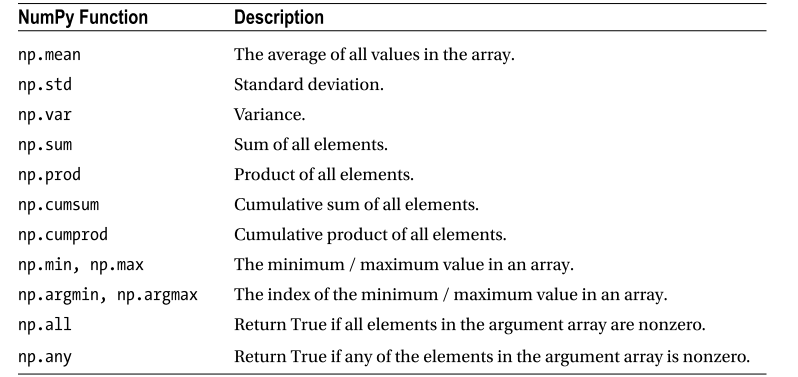

In [114]:
z = np.random.random((5,3))
z

array([[0.84354589, 0.95343499, 0.00499939],
       [0.59591938, 0.52327168, 0.34942818],
       [0.00944548, 0.65836539, 0.13819755],
       [0.03065781, 0.58319093, 0.58667243],
       [0.08131855, 0.68302313, 0.8247658 ]])

In [115]:
np.max(z), np.max(z, axis=0), np.max(z, axis=1)

(0.953434990131088,
 array([0.84354589, 0.95343499, 0.8247658 ]),
 array([0.95343499, 0.59591938, 0.65836539, 0.58667243, 0.8247658 ]))

In [116]:
z

array([[0.84354589, 0.95343499, 0.00499939],
       [0.59591938, 0.52327168, 0.34942818],
       [0.00944548, 0.65836539, 0.13819755],
       [0.03065781, 0.58319093, 0.58667243],
       [0.08131855, 0.68302313, 0.8247658 ]])

In [117]:
np.sum(z), np.sum(z, axis=0), np.sum(z, axis=1)

(6.866236573565155,
 array([1.56088711, 3.40128611, 1.90406335]),
 array([1.80198027, 1.46861923, 0.80600842, 1.20052117, 1.58910748]))

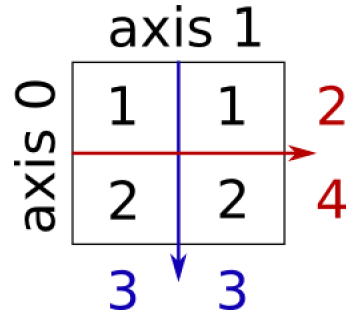

In [119]:
a = np.random.randn(3,4, 5)

In [120]:
np.sum(a, axis=0).shape

(4, 5)

In [121]:
np.sum(a, axis=1).shape

(3, 5)

In [122]:
sum([a[:, i, :] for i in range(a.shape[1])])

array([[ 2.20781353, -0.04656694,  1.82862223,  2.66447961,  1.58323666],
       [-0.53589411,  1.37462569,  1.33576332,  1.50645036,  2.43093764],
       [ 0.21721964,  2.77743287,  0.67639061, -0.31629292, -1.62247778]])

In [123]:
np.sum(a, axis=1)

array([[ 2.20781353, -0.04656694,  1.82862223,  2.66447961,  1.58323666],
       [-0.53589411,  1.37462569,  1.33576332,  1.50645036,  2.43093764],
       [ 0.21721964,  2.77743287,  0.67639061, -0.31629292, -1.62247778]])

## 条件表达式

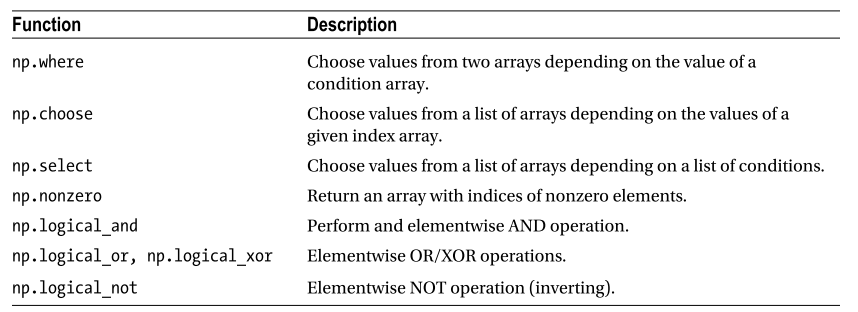

In [124]:
a = np.random.random(10)*2 + -1 # random with(-1, 1)
a

array([-0.34786756,  0.68466874, -0.99858433, -0.94597711, -0.02089848,
       -0.9678449 ,  0.44256896, -0.72863849, -0.91199357,  0.88127015])

In [125]:
a[a>0.3] = 1.0
a

array([-0.34786756,  1.        , -0.99858433, -0.94597711, -0.02089848,
       -0.9678449 ,  1.        , -0.72863849, -0.91199357,  1.        ])

In [126]:
a > 0.3

array([False,  True, False, False, False, False,  True, False, False,
        True])

In [127]:
np.where(a>0.3)

(array([1, 6, 9]),)

In [128]:
b = np.random.randn(5,4)

np.where(b>0.5)

(array([0, 0, 0, 2, 3, 4]), array([1, 2, 3, 2, 0, 0]))

In [129]:
np.where((a > 0.3) & (np.sin(a) > 0.6 ))

(array([1, 6, 9]),)

In [130]:
a[np.where((a > 0.3) & (np.sin(a) > 0.6 ))]

array([1., 1., 1.])

In [131]:
np.select([a>0, a<0], [a, a*-1])

array([0.34786756, 1.        , 0.99858433, 0.94597711, 0.02089848,
       0.9678449 , 1.        , 0.72863849, 0.91199357, 1.        ])

In [132]:
np.linspace??

## Broadcasting(广播)

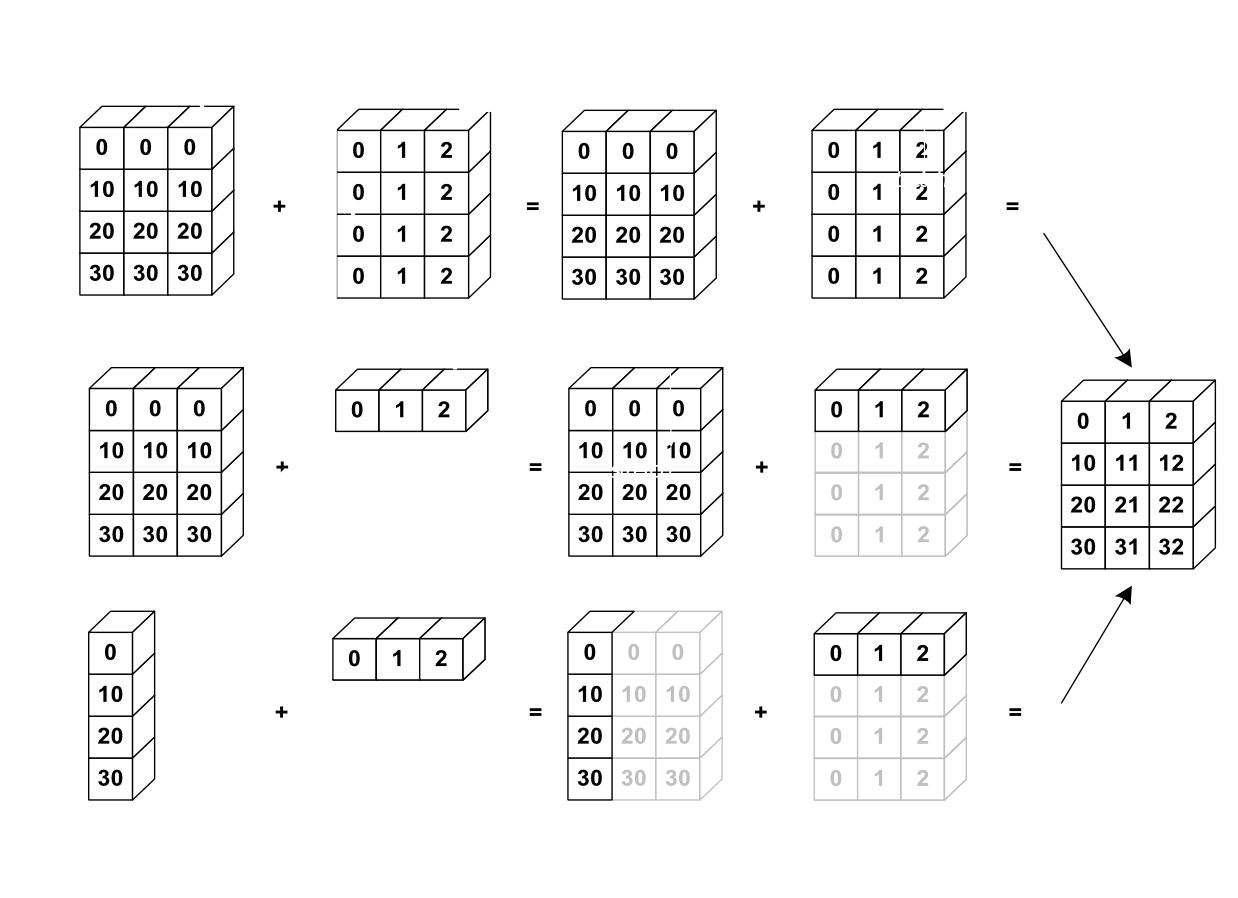

In [133]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
b = np.array([0, 1, 2])
c = np.empty_like(a)   

for i in range(a.shape[0]):
    c[i, :] = a[i, :] + b

print(a, "\n\n", c)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [134]:
np.tile?

In [135]:
b1 = np.tile(b, (a.shape[0], 1))
c = a + b1
print(a, "\n\n", a + b)


[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [136]:
b1

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [137]:
np.tile(b, (a.shape[0], 3))

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [138]:
c = a+b
print(a, "\n\n", c)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [139]:
a = np.arange(0, 40, 10)
a = a.reshape(4, 1)
# a = a[:, np.newaxis]  # adds a new axis -> 2D array

b = np.array([0, 1, 2])
c = a+b

print(a, "\n\n", b,"\n\n", c)

[[ 0]
 [10]
 [20]
 [30]] 

 [0 1 2] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [140]:
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [141]:
a * b # universal function: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs

array([[ 0,  0,  0],
       [ 0, 10, 20],
       [ 0, 20, 40],
       [ 0, 30, 60]])

## 数组形状操作

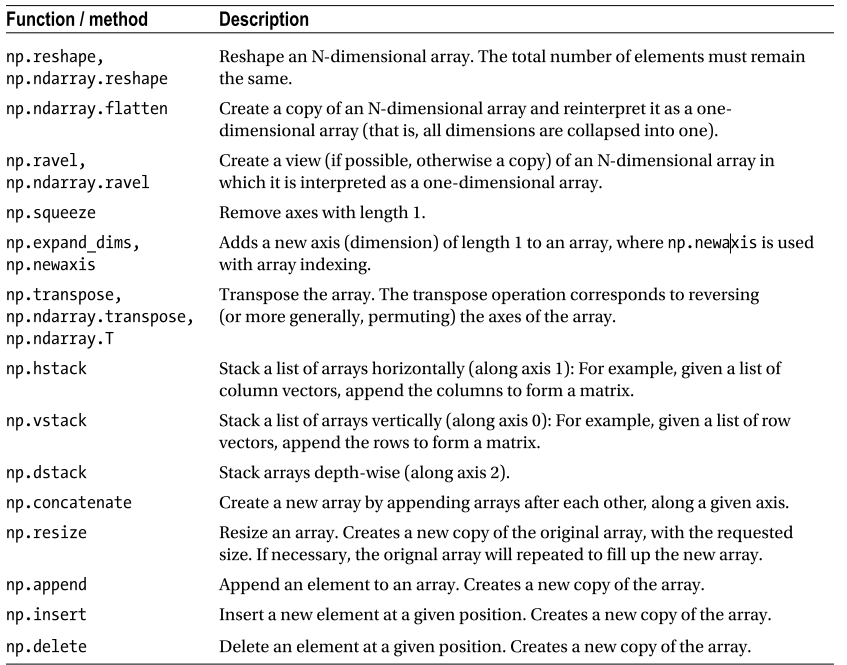

In [142]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [143]:
print(a.ravel(), "\n\n", a.flatten())

[1 2 3 4 5 6] 

 [1 2 3 4 5 6]


In [144]:
a.flatten?

In [145]:
a.reshape((3, 8))

ValueError: cannot reshape array of size 6 into shape (3,8)

In [146]:
a.reshape(2, -1)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [147]:
a.reshape(2, 3)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [148]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

In [149]:
a

array([[1, 2],
       [3, 4]])

In [150]:
b

array([[5, 6]])

In [151]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [152]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [153]:
np.append?

# 例子

## 康威生命游戏

1. 当前细胞为存活状态时，当周围低于2个（不包含2个）存活细胞时， 该细胞变成死亡状态。（模拟生命数量稀少）
1. 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
1. 当前细胞为存活状态时，当周围有3个以上的存活细胞时，该细胞变成死亡状态。（模拟生命数量过多）
1. 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）

Ref:

康威生命游戏: [中文](https://zh.wikipedia.org/wiki/%E5%BA%B7%E5%A8%81%E7%94%9F%E5%91%BD%E6%B8%B8%E6%88%8F), [英文](https://en.wikipedia.org/wiki/The_Game_of_Life)

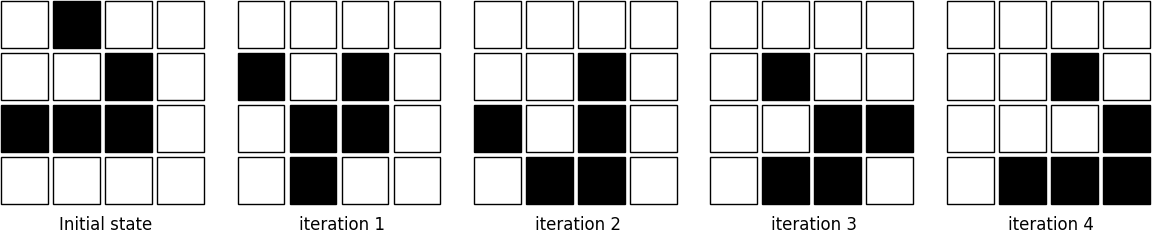

### Python 实现

In [154]:
def compute_neighbours(Z):
    shape = len(Z), len(Z[0])
    N  = [[0,]*(shape[0]) for i in range(shape[1])]
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]            +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [155]:
def iterate(Z):
    N = compute_neighbours(Z)
    shape = len(Z), len(Z[0])
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [156]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z

Z = Z1.tolist()
Z

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

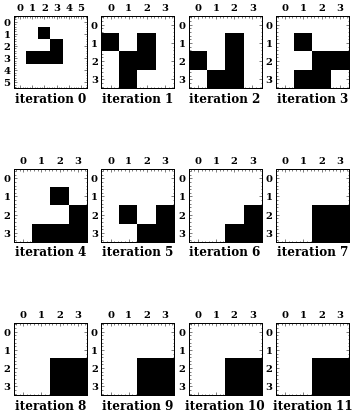

In [157]:
fig, axes = plt.subplots(3, 4, figsize=(6, 8))

axes = axes.flatten()

axes[0].matshow(Z, cmap="Greys")
axes[0].set_xlabel("iteration %s" % 0)

for i in range(1,12):
    Z = iterate(Z)
    axes[i].matshow(np.array(Z)[1:-1, 1:-1], cmap="Greys")
    axes[i].set_xlabel("iteration %s" % i)

### Numpy 实现 1

In [158]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z

Z = Z1

In [159]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

In [160]:
Z[ :-2, :-2]

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 1]])

In [161]:
Z1

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [162]:
N

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 1, 2, 1, 0],
       [0, 3, 5, 3, 2, 0],
       [0, 1, 3, 2, 2, 0],
       [0, 2, 3, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [163]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

# Flatten arrays
N_ = N.ravel()
Z_ = Z.ravel()

# Apply rules
# 当前细胞为存活状态时，当周围低于2个（不包含2个）存活细胞时， 该细胞变成死亡状态。（模拟生命数量稀少）
R1 = np.argwhere( (Z_==1) & (N_ < 2) )
# 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
R2 = np.argwhere( (Z_==1) & (N_ > 3) )
# 当前细胞为存活状态时，当周围有3个以上的存活细胞时，该细胞变成死亡状态。（模拟生命数量过多）
R3 = np.argwhere( (Z_==1) & ((N_==2) | (N_==3)) )
# 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）
R4 = np.argwhere( (Z_==0) & (N_==3) )

# Set new values
Z_[R1] = 0
Z_[R2] = 0
Z_[R3] = Z_[R3]
Z_[R4] = 1

# Make sure borders stay null
Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0

In [164]:
np.argwhere?

In [165]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

### Numpy 实现 2

In [166]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z

Z = Z1

In [167]:
%%timeit -r 10 -n 10 
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])


# 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）
birth = (N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0)

# 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
survive = ((N==2) | (N==3))[1:-1,1:-1] & (Z[1:-1,1:-1]==1)
Z[...] = 0
Z[1:-1,1:-1][birth | survive] = 1

40.2 µs ± 8.28 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [168]:
(N == 3)[1:-1,1:-1]

array([[False, False, False, False],
       [ True, False,  True, False],
       [False,  True, False, False],
       [False,  True, False, False]])

In [169]:
Z[1:-1,1:-1]==0

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False, False],
       [ True,  True, False, False]])

In [170]:
(N == 3)[1:-1, 1:-1] & (Z[1:-1, 1:-1]==0)

array([[False, False, False, False],
       [ True, False,  True, False],
       [False,  True, False, False],
       [False,  True, False, False]])

In [171]:
Z[...] = 10

In [172]:
Z

array([[10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10]])

In [174]:
# Video("game-of-life.mp4")

# 参考

1. [Numerical Python: A Practical Techniques Approach for Industry](https://www.amazon.com/Numerical-Python-Practical-Techniques-Approach/dp/1484205545)
1. [Guide to NumPy, by the creator of Numpy](http://web.mit.edu/dvp/Public/numpybook.pdf)
1. [Scipy Lecture Notes](http://www.scipy-lectures.org/intro/numpy/)
1. [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy)